# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Predict price of used Cars**

This project aims to predict the pricing for used carsusing machine learning models. The goal is not only to estimate prices accurately but also to identify which vehicle features have the greatest impact on value. This will help us understand what drives used car pricing and allow the business to price more competitively and prioritize high-value listings. The dataset is from Kaggle.

Key features considered include:

*  Manufaturer (eg : Tesla,BMW)
*  Odometer (Mileage)
*  Tile Status (eg: Clean,Salvage)
*  Drive (eg: fwd,rwd,4wd)
*  Year
*  fuel (eg:gas,electric)
*  condition (eg:like new,good,fair)
*  Type (eg: Sedan, SUV)
*  Transmission (eg: Manual,Others)
  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
vehicle_df = pd.read_csv('data/vehicles.csv')

In [63]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [64]:
vehicle_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Describe for meanigful numerical values found in the dataset

In [65]:
vehicle_df[['odometer','price']].describe().round(2)


,odometer,price
count,422480.00,4.268800e+05
mean,98043.33,7.519903e+04
std,213881.50,1.218228e+07
min,0.00,0.000000e+00
25%,37704.00,5.900000e+03
50%,85548.00,1.395000e+04
75%,133542.50,2.648575e+04
max,10000000.00,3.736929e+09


In [66]:
# Making a list of all categorical variables
cat_col = vehicle_df.select_dtypes(include='object').columns.tolist()
# Printing number of count of each unique value in each column
for column in cat_col:
    print(vehicle_df[column].value_counts())
    print("#" * 40)

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
########################################
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               542

In [67]:
# cehck for duplicate records in the dataframe
vehicle_df.duplicated().sum()

np.int64(0)

**Observations**

* Vehicle type has other vehicles than cars(ex :Bus,Mini-van).
* State data shows that most of the used cars is from california.
* No Duplicates are found due to unique id value column.But we can see duplicate data for VIN column which indicates duplicates.
* In Price the max value is 3736928711.0 and  min is 0 which is a very wide range for the data and the max value looks like a outlier as the 25th percentile is 13950.0. Further analysis is needed.
* Odomter has a max value of 10000000.0 which seems like a outlier.Futher analysis needed



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [68]:
# Created a new DataFrame only for Cars data as Vehicle data had Bus/Truck/Mini-van etc
cars_df = vehicle_df.query('type in ["sedan","SUV","other","coupe","hatchback","wagon","convertible"]')
cars_df.shape
print(f"Rows : {cars_df.shape[0]} \nColumns : {cars_df.shape[1]} ")

Rows : 240734 
Columns : 18 


In [69]:
# Dropping ID column in the cars Dataframe as it is a unique identification column and check duplicate records
cars_df = cars_df.drop(columns='id')
cars_df.duplicated().sum()

np.int64(30467)

In [70]:
#Drop duplicated records
cars_df=cars_df.drop_duplicates()
cars_df.shape
print(f"Rows : {cars_df.shape[0]} \nColumns : {cars_df.shape[1]} ")

Rows : 210267 
Columns : 17 


In [71]:
# Null count for all the columns in the cars Dataframe
cars_df.isna().sum()

,0
region,0
price,0
year,451
manufacturer,7132
model,1487
condition,64114
cylinders,75680
fuel,981
odometer,2185
title_status,4155


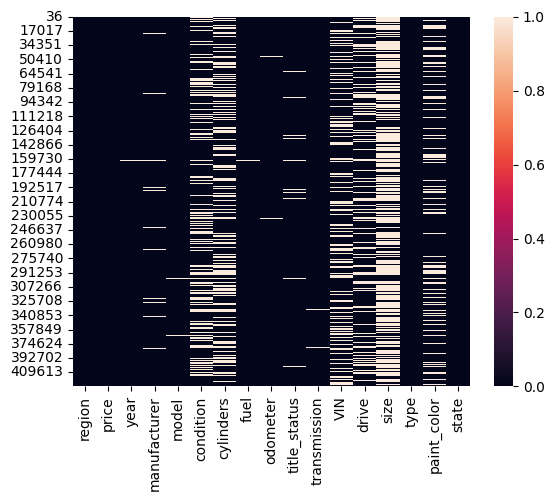

In [72]:
#Heatmap to check null values density across all the columns
sns.heatmap(cars_df.isna());

In [73]:
# Columns dropped based on their usefulness in predicting the price as well as based on percentage of missing data
## Region,State,VIN,paint_color columns dropped as our model is built based on the features of the car.
## cylinders and Size has more than 50% missing data
## cylinders have moderate to low impact in model prediction
to_drop = ['region','state','VIN','paint_color','cylinders','size']
cars_df = cars_df.drop(to_drop, axis=1)

In [74]:
# New DataFrame created with data where less than 30% of the column values are null
threshold=cars_df.shape[1]/3
cars_clean_df = cars_df[cars_df.isnull().sum(axis=1)<=threshold]
cars_clean_df.shape
print(f"Rows : {cars_clean_df.shape[0]} \nColumns : {cars_clean_df.shape[1]} ")

Rows : 209887 
Columns : 11 


In [75]:
#Imputing values for condition column based on odometer values
cars_clean_df.loc[:, 'condition'] = np.where(
    (cars_clean_df['odometer'].isnull()) & (cars_clean_df['condition'].isnull()), 'unknown',
    np.where(
        (cars_clean_df['odometer'] < 5000) & (cars_clean_df['condition'].isnull()), 'like new',
        np.where(
            (cars_clean_df['odometer'] >= 5000) & (cars_clean_df['odometer'] < 15000) & (cars_clean_df['condition'].isnull()), 'good',
            np.where(
                (cars_clean_df['odometer'] >= 15000) & (cars_clean_df['condition'].isnull()), 'fair',
                cars_clean_df['condition']
            )
        )
    )
)

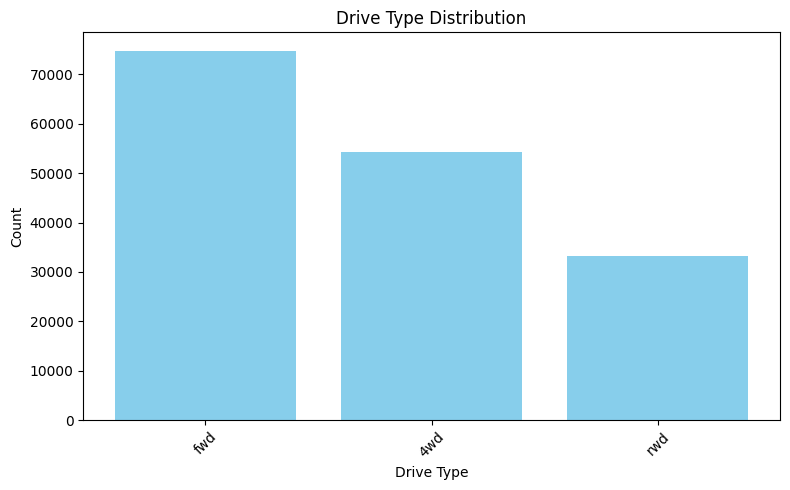

In [76]:
#Plot drive type distribution for cars
drive_counts=cars_clean_df['drive'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(drive_counts.index, drive_counts.values, color='skyblue')
plt.title('Drive Type Distribution')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
# Imputing drive values using mode()
cars_clean_df.loc[:,'drive']=cars_clean_df['drive'].fillna(cars_clean_df['drive'].mode()[0])
cars_clean_df.isna().sum().sum()

np.int64(16621)

In [78]:
# Dropped all the null records as it is less than 5% of the total records
cars_clean_df= cars_clean_df.dropna()
cars_clean_df.shape

(193775, 11)

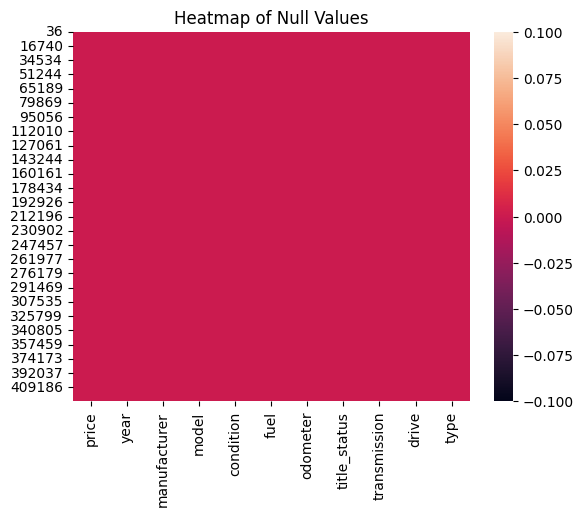

In [79]:
sns.heatmap(cars_clean_df.isna());
plt.title('Heatmap of Null Values');

In [80]:
#Describe for Numerical Columns in the Cars Dataset
cars_clean_df.describe().round(2)

,price,year,odometer
count,1.937750e+05,193775.00,193775.00
mean,2.526879e+04,2012.33,83963.11
std,3.227736e+06,8.04,144158.60
min,0.000000e+00,1900.00,0.00
25%,6.300000e+03,2010.00,31444.00
50%,1.399500e+04,2014.00,73304.00
75%,2.499000e+04,2017.00,120424.00
max,1.410065e+09,2022.00,10000000.00


In [81]:
# Check for outliers in the Data
cars_clean_df['price'].sort_values().tail(5)

,price
68935,2000000
105843,6995495
193736,123456789
137807,123456789
184704,1410065407


In [82]:
cars_clean_df.shape

(193775, 11)

In [83]:
# Record count with price as less than 500 which is @ 10%
cars_clean_df[cars_clean_df['price']<=500]['price'].shape[0]

16740

In [84]:
# Record count with price as greater than 50000 which is higher than 95% of data
cars_clean_df[cars_clean_df['price']>50000]['price'].shape[0]

2738

In [85]:
# dropping records where price is less than 500.
cars_clean_df = cars_clean_df.drop(cars_clean_df[cars_clean_df['price']<=500].index)

In [86]:
# dropping records where price is greater than 50000 as it is a outlier.
cars_clean_df = cars_clean_df.drop(cars_clean_df[cars_clean_df['price']>=50000.0].index)

In [87]:
cars_clean_df['odometer'].sort_values().tail(20)

,odometer
238718,9999999.0
154048,9999999.0
97847,9999999.0
63430,9999999.0
378377,9999999.0
27200,9999999.0
378708,9999999.0
238710,9999999.0
317864,9999999.0
334534,9999999.0


In [88]:
cars_clean_df.shape

(174276, 11)

In [89]:
cars_clean_df.query('odometer>400000')['odometer'].shape[0]

194

In [90]:
# Dropping records with odometer higher than 400k miles as it is bad data
cars_clean_df = cars_clean_df.drop(cars_clean_df[cars_clean_df['odometer']>400000].index)

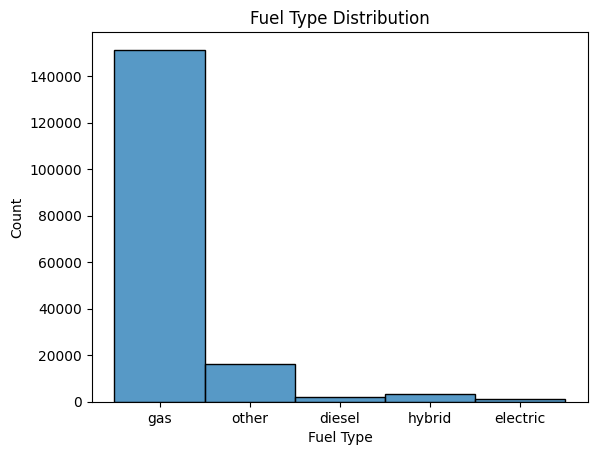

In [91]:
sns.histplot(data=cars_clean_df,x='fuel')
plt.title('Fuel Type Distribution');
plt.xlabel('Fuel Type');
plt.ylabel('Count');

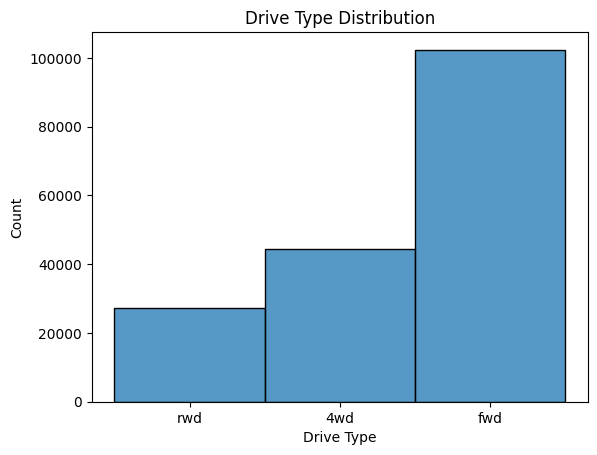

In [92]:
sns.histplot(data=cars_clean_df,x='drive')
plt.title('Drive Type Distribution');
plt.xlabel('Drive Type');
plt.ylabel('Count');

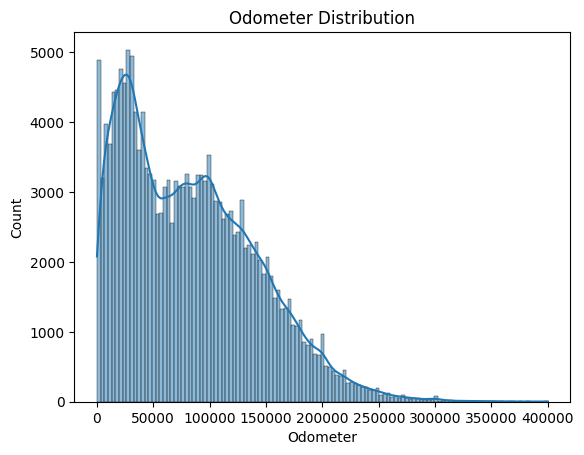

In [93]:
sns.histplot(data=cars_clean_df,x='odometer',kde=True)
plt.title('Odometer Distribution');
plt.xlabel('Odometer');
plt.ylabel('Count');

In [94]:
# Log1p() is used to normalize the price as it was right-skewed.
cars_clean_df['price'] = cars_clean_df['price'].astype(float)
cars_clean_df['price'] = np.log1p(cars_clean_df['price'])

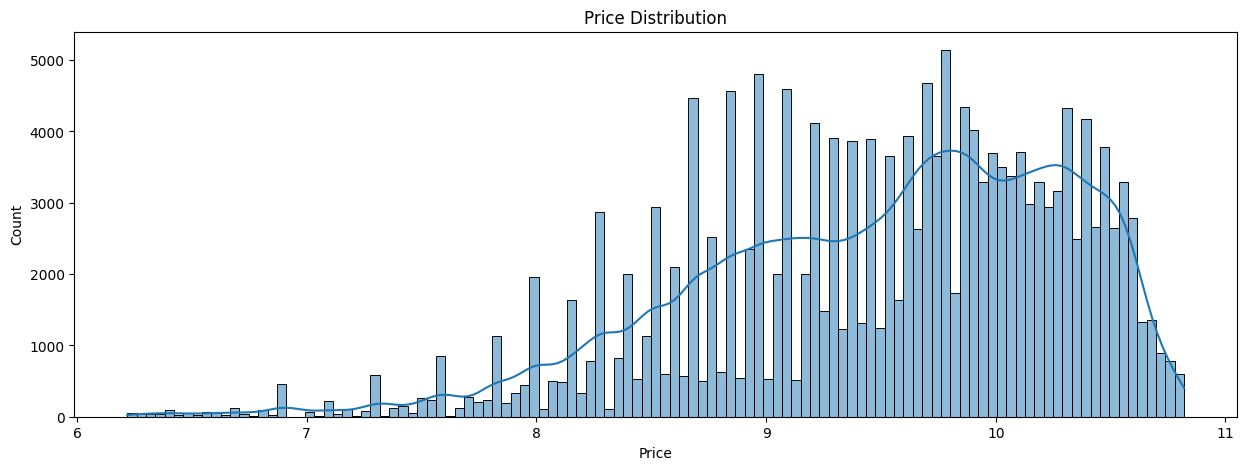

In [95]:
plt.figure(figsize=(15, 5))
sns.histplot(data=cars_clean_df,x='price',kde=True)
plt.title('Price Distribution');
plt.xlabel('Price');
plt.ylabel('Count');

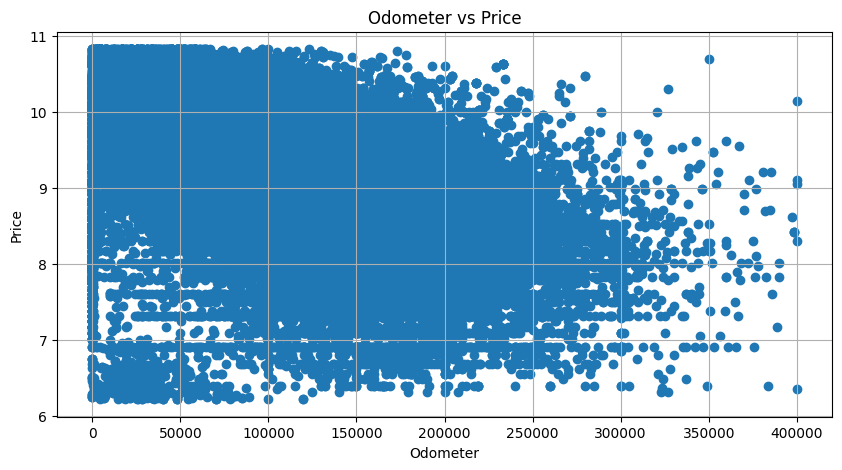

In [96]:
plt.figure(figsize=(10, 5))
plt.scatter(cars_clean_df['odometer'], cars_clean_df['price'])
plt.title('Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True);

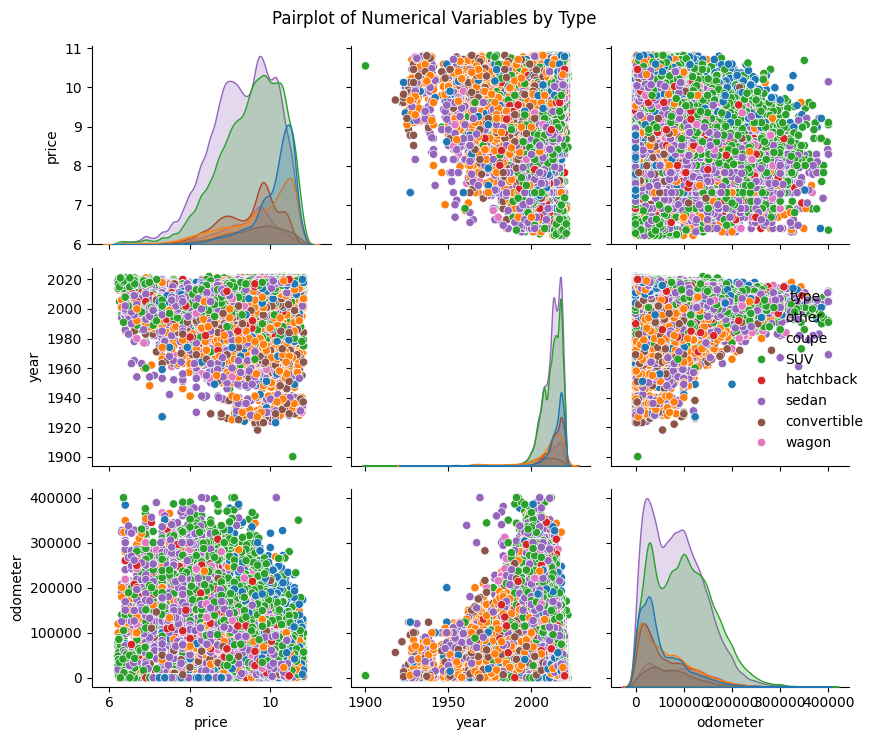

In [97]:
sns.pairplot(cars_clean_df, hue='type')
plt.suptitle('Pairplot of Numerical Variables by Type')
plt.tight_layout();

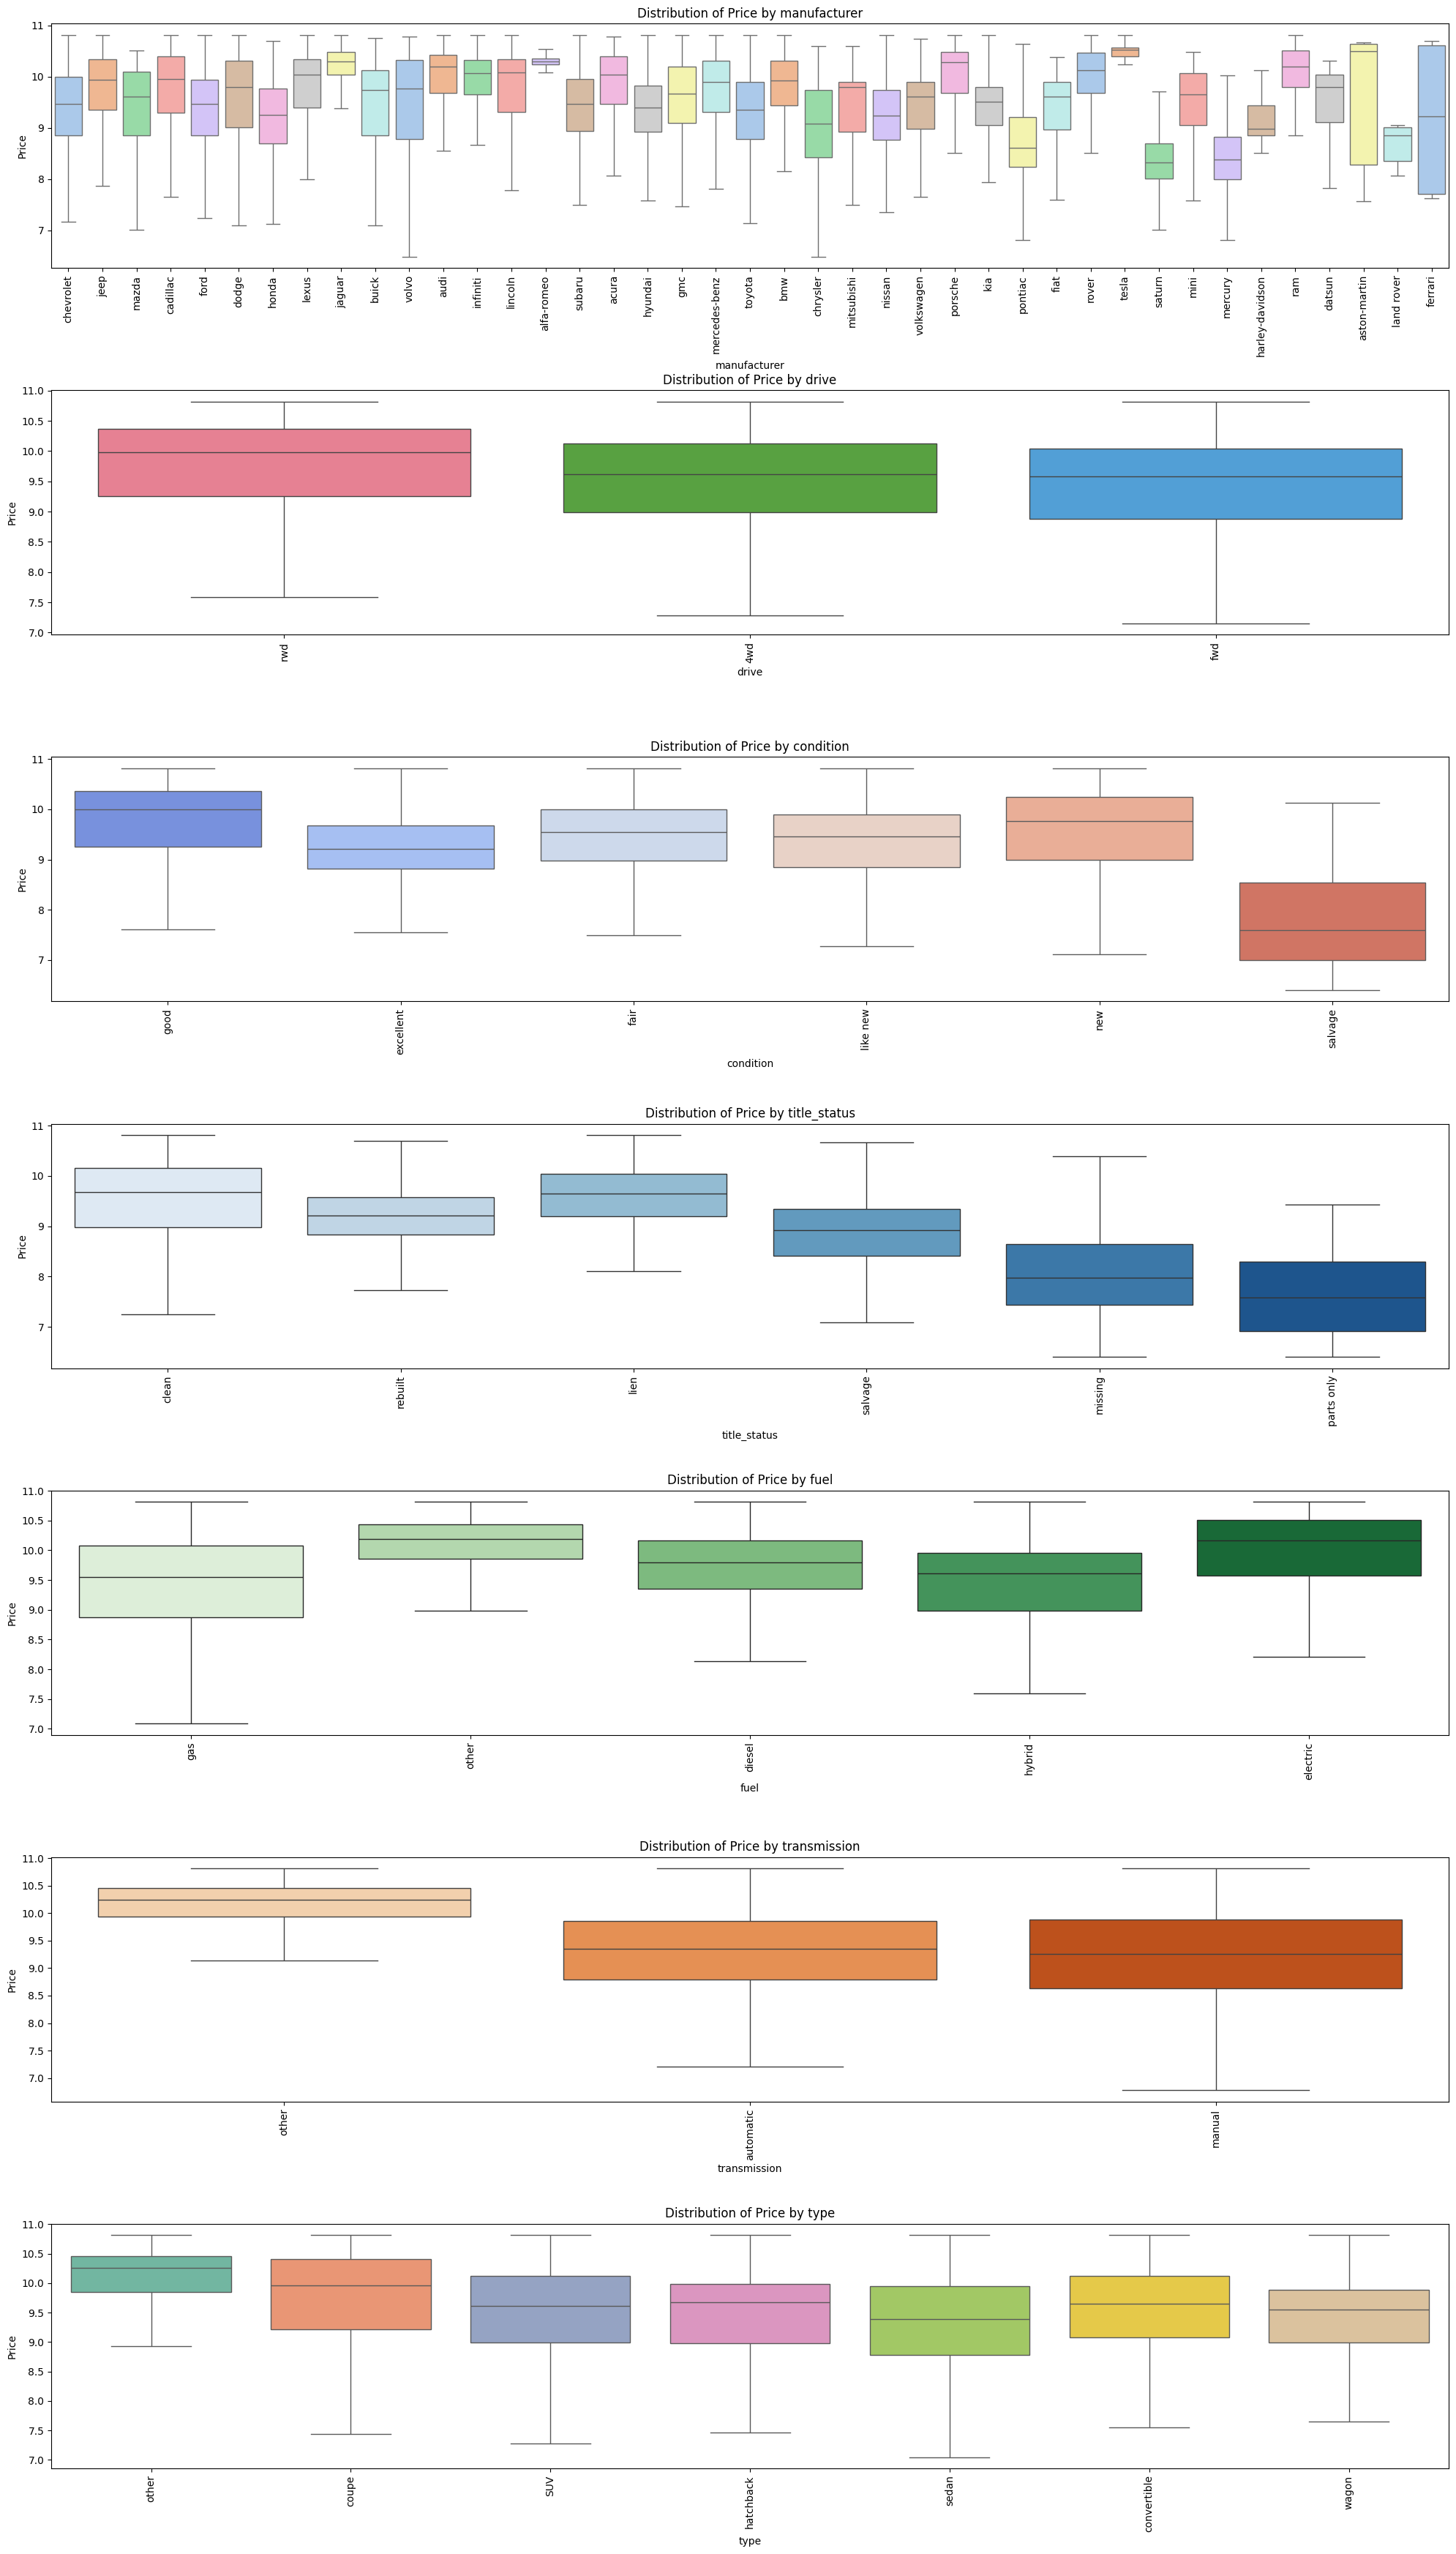

In [98]:
# Select only categorical variables
obj_columns = ['manufacturer','drive','condition','title_status','fuel','transmission','type']
plt.figure(figsize=(20, len(obj_columns) * 5))

palettes = ['Set2', 'pastel', 'husl', 'coolwarm', 'Blues', 'Greens', 'Oranges']
for i, col in enumerate(obj_columns, 1):
    plt.subplot(len(obj_columns), 1, i)
    sns.boxplot(data=cars_clean_df, x=col, y='price', hue=col, palette=palettes[i % len(palettes)], showfliers=False)  # hide outliers for clarity
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"Distribution of Price by {col}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [99]:
#since the unique values of model column is 4270 dropping the same
cars_clean_df=cars_clean_df.drop('model',axis=1)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display="diagram")

In [101]:
X=cars_clean_df.drop('price',axis=1).reset_index(drop=True)
y=cars_clean_df['price']
X_encoded=pd.get_dummies(X,drop_first=True)


In [102]:
X_encoded.head()

,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_convertible,type_coupe,type_hatchback,type_other,type_sedan,type_wagon
0,2011.0,30237.0,False,False,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1,2017.0,30041.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,2016.0,9704.0,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,2020.0,20581.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2020.0,2195.0,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [103]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174082 entries, 0 to 174081
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   year                          174082 non-null  float64
 1   odometer                      174082 non-null  float64
 2   manufacturer_alfa-romeo       174082 non-null  bool   
 3   manufacturer_aston-martin     174082 non-null  bool   
 4   manufacturer_audi             174082 non-null  bool   
 5   manufacturer_bmw              174082 non-null  bool   
 6   manufacturer_buick            174082 non-null  bool   
 7   manufacturer_cadillac         174082 non-null  bool   
 8   manufacturer_chevrolet        174082 non-null  bool   
 9   manufacturer_chrysler         174082 non-null  bool   
 10  manufacturer_datsun           174082 non-null  bool   
 11  manufacturer_dodge            174082 non-null  bool   
 12  manufacturer_ferrari          174082 non-nul

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [105]:
X_train.shape

(121857, 66)

In [106]:
X_test.head()

,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,transmission_manual,transmission_other,drive_fwd,drive_rwd,type_convertible,type_coupe,type_hatchback,type_other,type_sedan,type_wagon
3713,2001.0,164000.0,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
34102,1999.0,178000.0,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
170777,2011.0,131118.0,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
69977,2017.0,24238.0,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
60826,2013.0,154315.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [107]:
results=[]
linreg =LinearRegression().fit(X_train,y_train)
train_preds =linreg.predict(X_train)
test_preds =linreg.predict(X_test)
#coef = linreg.coef_
slope = f"{linreg.coef_[0]:.2f}"
intercept =  f"{linreg.intercept_:.2f}"

mse_train =mean_squared_error(y_train,train_preds)
mse_test =mean_squared_error(y_test,test_preds)
print(f"MSE_TRAIN: {mse_train:.2f}")
print(f"MSE_TEST: {mse_test:.2f}")

feature_importance = pd.Series(linreg.coef_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False).head(10))


rmse_train = np.expm1(np.sqrt(mse_train))
rmse_test = np.expm1(np.sqrt(mse_test))

print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
results.append({
        "Model": 'LinearRegression',
        "RMSE train": rmse_train,
        "RMSE test": rmse_test
    })


MSE_TRAIN: 0.23
MSE_TEST: 0.22
manufacturer_datsun     0.651791
manufacturer_ram        0.466448
manufacturer_tesla      0.308239
manufacturer_porsche    0.284833
transmission_other      0.237820
manufacturer_lexus      0.201892
manufacturer_audi       0.128401
title_status_lien       0.093849
type_other              0.088613
transmission_manual     0.082773
dtype: float64
RMSE Train: 0.61
RMSE Test: 0.60


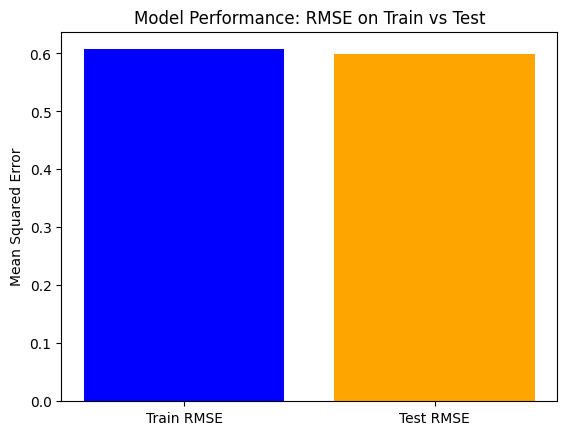

In [108]:
plt.bar(['Train RMSE', 'Test RMSE'], [rmse_train, rmse_test], color=['blue', 'orange'])
plt.title('Model Performance: RMSE on Train vs Test')
plt.ylabel('Mean Squared Error')
plt.show()

In [109]:
# scaling data using Standard scale for converting it to  𝑧 -scores.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X_train, y_train)
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, train_preds)
ridge_test_mse = mean_squared_error(y_test, test_preds)
print(f"Train MSE: {ridge_train_mse:.2f}")
print(f"Test MSE: {ridge_test_mse:.2f}")
ridge_rmse_train = np.expm1(np.sqrt(ridge_train_mse))
ridge_rmse_test = np.expm1(np.sqrt(ridge_test_mse))

print(f"RMSE Train: {ridge_rmse_train:.2f}")
print(f"RMSE Test: {ridge_rmse_test:.2f}")
ridge_feature_importance = pd.Series(scaled_pipe.named_steps['ridge'].coef_, index=X_train.columns)
print(ridge_feature_importance.sort_values(ascending=False).head(10))
results.append({
        "Model": 'Ridge',
        "RMSE train": ridge_rmse_train,
        "RMSE test": ridge_rmse_test
    })


Train MSE: 0.23
Test MSE: 0.22
RMSE Train: 0.61
RMSE Test: 0.60
year                   0.186461
transmission_other     0.101769
manufacturer_lexus     0.035607
drive_rwd              0.029980
type_other             0.025529
condition_fair         0.022705
manufacturer_audi      0.022372
transmission_manual    0.018921
manufacturer_tesla     0.018259
manufacturer_ram       0.018211
dtype: float64


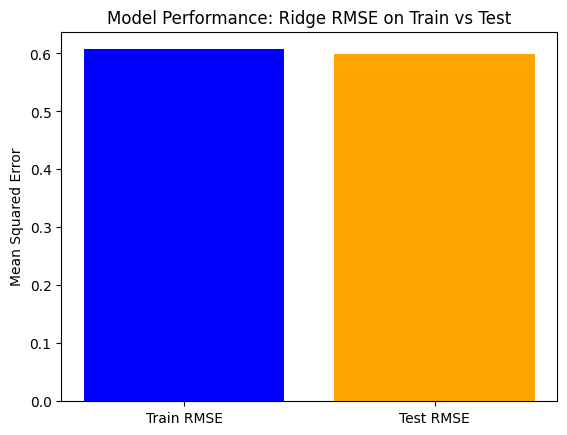

In [111]:
plt.bar(['Train RMSE', 'Test RMSE'], [ridge_rmse_train, ridge_rmse_test], color=['blue', 'orange'])
plt.title('Model Performance: Ridge RMSE on Train vs Test')
plt.ylabel('Mean Squared Error')
plt.show()

In [112]:
lasso_pipe = Pipeline([('scaler', StandardScaler()),
                     ('lasso', Lasso(alpha=0.1))])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

In [113]:
lasso_train_pred=lasso_pipe.predict(X_train)
lasso_test_pred=lasso_pipe.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
print(f"Train MSE: {lasso_train_mse:.2f}")
print(f"Test MSE: {lasso_test_mse:.2f}")
lasso_rmse_train = np.expm1(np.sqrt(lasso_train_mse))
lasso_rmse_test = np.expm1(np.sqrt(lasso_test_mse))

print(f"RMSE Train: {lasso_rmse_train:.2f}")
print(f"RMSE Test: {lasso_rmse_test:.2f}")

results.append({
        "Model": 'Lasso',
        "RMSE train": lasso_rmse_train,
        "RMSE test": lasso_rmse_test
    })

print(lasso_pipe.named_steps['lasso'].coef_)

Train MSE: 0.30
Test MSE: 0.30
RMSE Train: 0.73
RMSE Test: 0.72
[ 0.1086177  -0.38997534  0.         -0.          0.          0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.05493883 -0.03306216  0.
  0.          0.         -0.          0.         -0.02376425 -0.        ]


In [114]:
lasso_feature_imp = pd.Series(lasso_pipe.named_steps['lasso'].coef_, index=X_train.columns)
lasso_feature_imp.sort_values(ascending=False)

,0
year,0.108618
transmission_other,0.054939
manufacturer_porsche,0.000000
manufacturer_alfa-romeo,0.000000
manufacturer_audi,0.000000
...,...
type_hatchback,-0.000000
type_other,0.000000
type_sedan,-0.023764
drive_fwd,-0.033062


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [115]:
results_df =pd.DataFrame(results)
results_df

,Model,RMSE train,RMSE test
0,LinearRegression,0.607047,0.599376
1,Ridge,0.607047,0.599376
2,Lasso,0.732555,0.724368


**Observations**

* When comparing the RMSE Values Linear Regression and Ridge perform identical (Train: 0.61, Test: 0.60)

* Lasso Regression seems to show higher error when compare to other linear models on both train and test (Train: 0.73, Test: 0.72)

* Linear Regression Performs well on both train and test data by minimizing the total squared error between predicted and actual values, requires No regularization but may overfit for complex data.

* Ridge Regression performs similar to Linear Regression and suggests that the model is not get affected by overfitting or multicollinearity and also the regularization did not have any negative or positive effect.

* Lasso Regression did not perform well on this dataset with features selected, might be due to important removed important features or the dataset doesn’t have enough irrelevant features to benefit from feature selection.
Further analysis needed with the dropped features to see if it makes any difference.



**Recommendations:**

* Based on the RMSE values, Linear Regression and Ridge Regression perform better on both training and testing datasets with nearly identical results and we can choose Ridge as it is robust and performs well with the increase in the dataset size and with more outliers.

*Lasso Regression needs some more tuning with addition of other features and can be taken as an Enhancement to the model or the dataset needs to be looked up for relevant features that can be added for the model to perform efficiently



**Final Recommendation:**

* We can use either Linear or Ridge Regression as both fit well and generalize effectively, Recommending ridge over Linear due to its Regularization to handle increase in dataset and outliers.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Business Recommendations**

Based on the analysis, several key factors have emerged as strong predictors of a vehicle’s resale value. Used car dealers can apply these insights to improve pricing strategies, inventory management, and overall profitability:

* Prioritize Newer Vehicles: Vehicle age plays a significant role in determining resale value. Newer models are attractive assets for dealerships. Dealers should aim to stock recent-year vehicles whenever possible.

* Monitor Odometer Readings: Mileage is directly correlated with depreciation. Vehicles with lower odometer readings retain more value, so prioritizing low-mileage cars can lead to better margins. High-mileage cars should only be considered if they can be sourced at lower costs.

* Consider Condition and Drive Type: A vehicle’s condition (e.g., excellent, good, fair) and drive type (e.g., AWD, FWD, RWD) significantly impact buyer perception and market value. .

* Focus on Manufacturer and Transmission: The brand (manufacturer) and transmission type (manual or automatic) also influence pricing. Well-known and reliable brands typically retain more value, and automatic transmissions are often preferred in many markets.

By aligning inventory and pricing strategies with these data-driven insights, dealerships can enhance competitiveness, optimize inventory turnover, and ultimately increase profitability.